## Лабораторная работа №9. Решение задач машинного обучения с помощью логических методов классификации.

Используемый набор данных: [Breast Cancer Wisconsin (Prognostic)](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import os
import requests

%matplotlib inline

pd.options.display.max_columns = None

In [2]:
def downloadFile(url, filePath):
    if not os.path.exists(filePath):
        req = requests.get(url)
        f = open(filePath, "wb")
        f.write(req.content)
        f.close

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin"
downloadFile(url + "/wpbc.data", "dataset/wpbc.data")
downloadFile(url + "/wpbc.names", "dataset/wpbc.names")

In [3]:
headers = ["ID", "Outcome", "Time", "Radius Mean", "Texture Mean", "Perimeter Mean", "Area Mean", "Smoothness Mean",
           "Compactness Mean", "Concavity Mean", "Concave points Mean", "Symmetry Mean", "Fractal dimension Mean",
           "Radius SE", "Texture SE", "Perimeter SE", "Area SE", "Smoothness SE", "Compactness SE", "Concavity SE",
           "Concave points SE", "Symmetry SE", "Fractal dimension SE", "Radius Worst", "Texture Worst", "Perimeter Worst",
           "Area Worst", "Smoothness Worst", "Compactness Worst", "Concavity Worst", "Concave points Worst",
           "Symmetry Worst", "Fractal dimension Worst", "Tumor size", "Lymph node status"]  
data = pd.read_csv("dataset/wpbc.data", names=headers)
data = data.astype({"Outcome": "category"})
data.sample(40)

,ID,Outcome,Time,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave points Mean,Symmetry Mean,Fractal dimension Mean,Radius SE,Texture SE,Perimeter SE,Area SE,Smoothness SE,Compactness SE,Concavity SE,Concave points SE,Symmetry SE,Fractal dimension SE,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave points Worst,Symmetry Worst,Fractal dimension Worst,Tumor size,Lymph node status
64,868826,N,36,14.95,17.57,96.85,678.1,0.11670,0.13050,0.15390,0.08624,0.1957,0.06216,1.2960,1.4520,8.419,101.90,0.010000,0.034800,0.06577,0.028010,0.051680,0.002887,18.55,21.43,121.40,971.4,0.1411,0.21640,0.3355,0.16670,0.3414,0.07147,1.2,8
34,855625,R,9,19.07,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,0.06343,0.9811,1.6660,8.830,104.90,0.006548,0.100600,0.09723,0.026380,0.053330,0.007646,24.09,33.17,177.40,1651.0,0.1247,0.74440,0.7242,0.24930,0.4670,0.10380,2.3,0
133,901088,N,61,20.44,21.78,133.80,1293.0,0.09150,0.11310,0.09799,0.07785,0.1618,0.05557,0.5781,0.9168,4.218,72.44,0.006208,0.019060,0.02375,0.014610,0.014450,0.001906,24.31,26.37,161.20,1780.0,0.1327,0.23760,0.2702,0.17650,0.2609,0.06735,1.0,0
108,887256,N,27,15.53,33.56,103.70,744.9,0.10630,0.16390,0.17510,0.08399,0.2091,0.06650,0.2419,1.2780,1.903,23.02,0.005345,0.025560,0.02889,0.010220,0.009947,0.003359,18.49,49.54,126.30,1035.0,0.1883,0.55640,0.5703,0.20140,0.3512,0.12040,2.5,3
94,881190,N,74,19.53,32.47,128.00,1223.0,0.08420,0.11300,0.11450,0.06637,0.1428,0.05313,0.7392,1.3210,4.722,109.90,0.005539,0.026440,0.02664,0.010780,0.013320,0.002256,27.90,45.41,180.20,2477.0,0.1408,0.40970,0.3995,0.16250,0.2713,0.07568,2.8,0
88,879523,R,17,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,0.2711,0.3621,1.974,26.44,0.005472,0.019190,0.02039,0.008260,0.015230,0.002881,17.77,20.24,117.70,989.5,0.1491,0.33310,0.3327,0.12520,0.3415,0.09740,1.5,0
26,854002,N,53,19.27,26.47,127.90,1162.0,0.09401,0.17190,0.16570,0.07593,0.1853,0.06261,0.5558,0.6062,3.528,68.17,0.005015,0.033180,0.03497,0.009643,0.015430,0.003896,24.15,30.90,161.40,1813.0,0.1509,0.65900,0.6091,0.17850,0.3672,0.11230,3.5,0
41,857793,N,62,14.71,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.08123,0.2027,0.06758,0.4226,1.1500,2.735,40.09,0.003659,0.028550,0.02572,0.012720,0.018170,0.004108,17.87,30.70,115.70,985.5,0.1368,0.42900,0.3587,0.18340,0.3698,0.10940,6.5,6
8,844981,N,119,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.012260,0.021430,0.003749,15.49,30.73,106.20,739.3,0.1703,0.54010,0.5390,0.20600,0.4378,0.10720,2.0,1
5,843786,R,77,12.75,15.29,84.60,502.7,0.11890,0.15690,0.16640,0.07666,0.1995,0.07164,0.3877,0.7402,2.999,30.85,0.007775,0.029870,0.04561,0.013570,0.017740,0.005114,15.51,20.37,107.30,733.2,0.1706,0.41960,0.5999,0.17090,0.3485,0.11790,2.5,0


In [4]:
data.dtypes

ID                            int64
Outcome                    category
Time                          int64
Radius Mean                 float64
Texture Mean                float64
Perimeter Mean              float64
Area Mean                   float64
Smoothness Mean             float64
Compactness Mean            float64
Concavity Mean              float64
Concave points Mean         float64
Symmetry Mean               float64
Fractal dimension Mean      float64
Radius SE                   float64
Texture SE                  float64
Perimeter SE                float64
Area SE                     float64
Smoothness SE               float64
Compactness SE              float64
Concavity SE                float64
Concave points SE           float64
Symmetry SE                 float64
Fractal dimension SE        float64
Radius Worst                float64
Texture Worst               float64
Perimeter Worst             float64
Area Worst                  float64
Smoothness Worst            

Колонка _Lymph node status_ имеет тип _object_. Проверим, имеются ли в ней пропуски.

In [5]:
data['Lymph node status'].replace({'?': np.nan}, inplace=True)
display(data.isna().sum())

ID                         0
Outcome                    0
Time                       0
Radius Mean                0
Texture Mean               0
Perimeter Mean             0
Area Mean                  0
Smoothness Mean            0
Compactness Mean           0
Concavity Mean             0
Concave points Mean        0
Symmetry Mean              0
Fractal dimension Mean     0
Radius SE                  0
Texture SE                 0
Perimeter SE               0
Area SE                    0
Smoothness SE              0
Compactness SE             0
Concavity SE               0
Concave points SE          0
Symmetry SE                0
Fractal dimension SE       0
Radius Worst               0
Texture Worst              0
Perimeter Worst            0
Area Worst                 0
Smoothness Worst           0
Compactness Worst          0
Concavity Worst            0
Concave points Worst       0
Symmetry Worst             0
Fractal dimension Worst    0
Tumor size                 0
Lymph node sta

Имеется 4 пропуска в колонке _Lymph node status_. [Заполним](https://basegroup.ru/community/articles/missing) их модой. Малое количество пропусков не должно привести к существенному искажению распределения.

In [6]:
data["Lymph node status"].fillna(data["Lymph node status"].mode()[0], inplace=True)
data = data.astype({"Lymph node status": "float64"})
data.drop(columns=["ID"], inplace=True)

display(data.dtypes["Lymph node status"])
display(data.describe())

dtype('float64')

,Time,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave points Mean,Symmetry Mean,Fractal dimension Mean,Radius SE,Texture SE,Perimeter SE,Area SE,Smoothness SE,Compactness SE,Concavity SE,Concave points SE,Symmetry SE,Fractal dimension SE,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave points Worst,Symmetry Worst,Fractal dimension Worst,Tumor size,Lymph node status
count,198.000000,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,46.732323,17.412323,22.27601,114.856566,970.040909,0.102681,0.142648,0.156243,0.086776,0.192754,0.062706,0.603346,1.264450,4.255394,70.228737,0.006762,0.031199,0.040750,0.015099,0.020555,0.003987,21.021818,30.139091,140.347778,1404.958586,0.143921,0.365102,0.436685,0.178778,0.323404,0.090828,2.847475,3.146465
std,34.462870,3.161676,4.29829,21.383402,352.149215,0.012522,0.049898,0.070572,0.033877,0.027437,0.007240,0.310112,0.526467,2.194128,47.982255,0.002974,0.017613,0.020869,0.005504,0.009578,0.001938,4.242997,6.017777,28.892279,586.006972,0.022004,0.163965,0.173625,0.045181,0.075161,0.021172,1.937964,5.442245
min,1.000000,10.950000,10.38000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,0.130800,0.050250,0.193800,0.362100,1.153000,13.990000,0.002667,0.007347,0.010940,0.005174,0.007882,0.001087,12.840000,16.670000,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000,0.000000
25%,14.000000,15.052500,19.41250,98.160000,702.525000,0.093900,0.110200,0.106850,0.063670,0.174075,0.056718,0.388200,0.921300,2.742500,35.365000,0.005001,0.019803,0.026810,0.011422,0.014795,0.002748,17.632500,26.210000,118.075000,947.275000,0.129325,0.248700,0.322150,0.152650,0.275950,0.076578,1.500000,0.000000
50%,39.500000,17.290000,21.75000,113.700000,929.100000,0.101900,0.131750,0.151350,0.086075,0.189350,0.061715,0.533250,1.168500,3.767000,58.455000,0.006193,0.027880,0.036910,0.014175,0.017905,0.003719,20.525000,30.135000,136.500000,1295.000000,0.141850,0.351300,0.402350,0.179250,0.310300,0.086890,2.500000,1.000000
75%,72.750000,19.580000,24.65500,129.650000,1193.500000,0.110975,0.172200,0.200500,0.103925,0.209325,0.066715,0.750900,1.463250,5.212750,92.477500,0.007973,0.038335,0.048970,0.017665,0.022880,0.004630,23.730000,33.555000,159.875000,1694.250000,0.154875,0.423675,0.541050,0.207125,0.358800,0.101375,3.500000,4.000000
max,125.000000,27.220000,39.28000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200,0.304000,0.097440,1.819000,3.503000,13.280000,316.000000,0.031130,0.135400,0.143800,0.039270,0.060410,0.012560,35.130000,49.540000,232.200000,3903.000000,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500,10.000000,27.000000


Подготовим тренировочные и тестовые выборки.

In [26]:
X = data.drop(columns=["Outcome"]).copy()
y = data["Outcome"].replace({'N': -1, 'R': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=27)

Создадим классификатор, обучим его, а затем выполним классификацию.

In [27]:
y_pred = DecisionTreeClassifier(max_depth=25).fit(X_train, y_train).predict(X_test)

Оценим получившуюся классификацию.

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.88      0.79      0.83        57
           1       0.37      0.54      0.44        13

    accuracy                           0.74        70
   macro avg       0.63      0.66      0.64        70
weighted avg       0.79      0.74      0.76        70



In [29]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

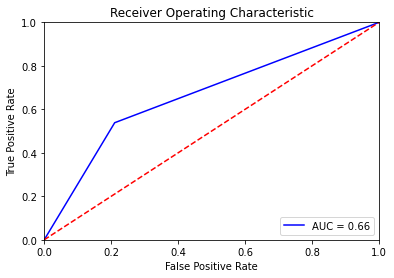

In [30]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = "AUC = %0.2f"%auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()